## Random Forest (Summarised)

### Made By Karima

In [9]:
%%time

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, f1_score, precision_recall_fscore_support , accuracy_score

from sklearn import tree

import shap
shap.initjs()
np.random.seed(1)

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import warnings  # For handling warnings
warnings.filterwarnings('ignore')  # Ignore all warnings
import random

print("Done!")

Done!
Wall time: 8.95 ms


In [6]:
# read csv files from repo
train_df = df = pd.read_csv("train_df.csv")
test_df = df = pd.read_csv("test_df.csv")
valid_df = df = pd.read_csv("valid_df.csv")

In [7]:
# split into features (X) and target (y)
X_train = train_df.drop("is_corona_positive", axis=1)
X_test = test_df.drop("is_corona_positive", axis=1)
X_valid = valid_df.drop("is_corona_positive", axis=1)

y_train = train_df["is_corona_positive"]
y_test = test_df["is_corona_positive"]
y_valid = valid_df["is_corona_positive"]

### Model on train/test data (untuned)

In [10]:
%%time

# create random forest classifier
rf = RandomForestClassifier()

# fit rf model on training data
rf.fit(X_train, y_train)

# make predictions on the train/test data
y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)

# tuple of precision, recall, f1 and support for train/test set
res_train = precision_recall_fscore_support(y_train, y_pred_train)
res_test = precision_recall_fscore_support(y_test, y_pred_test)

Wall time: 9.25 s


In [28]:
#display key metrics
print('The accuracy for the training set is {:.3f} \nThe accuracy for the test set is {:.3f}'.format(
    accuracy_score(y_train, y_pred_train), accuracy_score(y_test, y_pred_test)))
print('The F1 score for the training set is {:.3f} \nThe F1 score for the test set is {:.3f}'.format(
    f1_score(y_train, y_pred_train, average = 'macro'), f1_score(y_test, y_pred_test, average = 'macro')))
print('For the COVID Negative class the precision is {:.2f} for the training set and it is {:.2f} on the test set'.format(
    res_train[0][0], res_test[0][0]))
print('For the COVID positive class the recall is {:.2f} for the training set and it is {:.2f} on the test set'.format(
    res_train[1][0], res_test[1][0]))
print('For the COVID Positive class the precision is {:.2f} for the training set and it is {:.2f} on the test set'.format(
    res_train[0][1], res_test[0][1]))
print('For the COVID Negative class the recall is {:.2f} for the training set and it is {:.2f} on the test set'.format(
    res_train[1][1], res_test[1][1]))

The accuracy for the training set is 1.000 
The accuracy for the test set is 0.970
The F1 score for the training set is 1.000 
The F1 score for the test set is 0.831
For the COVID Negative class the precision is 1.00 for the training set and it is 0.98 on the test set
For the COVID positive class the recall is 1.00 for the training set and it is 0.99 on the test set
For the COVID Positive class the precision is 1.00 for the training set and it is 0.76 on the test set
For the COVID Negative class the recall is 1.00 for the training set and it is 0.62 on the test set


In [33]:
print(confusion_matrix(y_test, y_pred_test))

[[25775   280]
 [  547   869]]


In [32]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98     26055
           1       0.76      0.61      0.68      1416

    accuracy                           0.97     27471
   macro avg       0.87      0.80      0.83     27471
weighted avg       0.97      0.97      0.97     27471



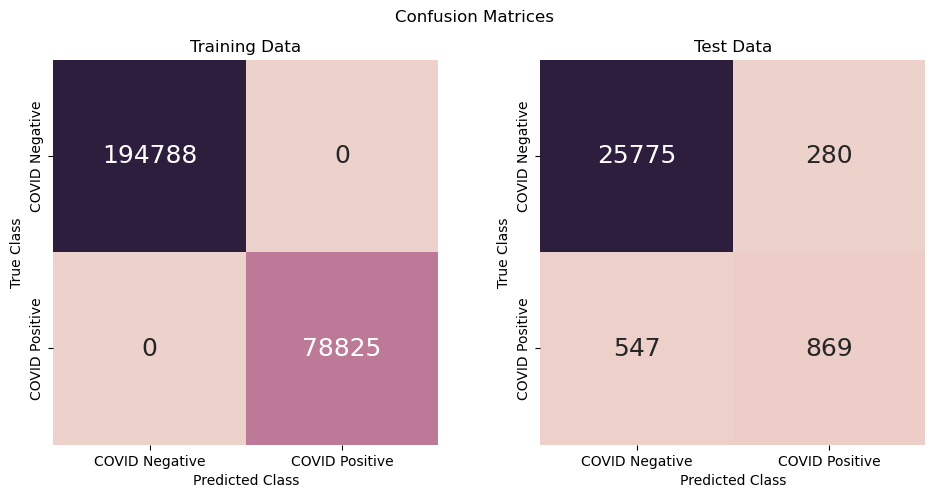

In [37]:
# function to plot confusion matrices
def plot_cnf(y_true, y_pred, ax, title):
    labs = ['COVID Negative', 'COVID Positive']
    conf_mat = confusion_matrix(y_true, y_pred)
    sns.heatmap(conf_mat,annot=True,fmt='d',cbar=False, xticklabels= labs, yticklabels= labs,ax = ax,
                square = True, cmap=sns.cubehelix_palette(as_cmap=True), annot_kws={"size": 18})
    ax.set_ylabel('True Class')
    ax.set_xlabel('Predicted Class')
    ax.set_title(title)
# Generate figure with 2 subplots
fig, axs =  plt.subplots(1,2, figsize = (12,5))
# plot confusion matrices
plot_cnf(y_train, y_pred_train, axs[0], "Training Data")
plot_cnf(y_test, y_pred_test, axs[1], "Test Data")
fig.suptitle('Confusion Matrices')
fig.subplots_adjust(wspace=0.1)
plt.show()

### Model on train/test data (tuned)

In [22]:
%%time

# create best rf model using tuned hyperparameters
rf_best = RandomForestClassifier(max_depth = None,
                            min_samples_split = 2,
                            n_estimators = 100)

# fit rf model on validation data
rf_best.fit(X_train, y_train)

# make predictions on the train/test data
y_pred_valid = rf_best.predict(X_valid)
y_pred_test_tuned = rf_best.predict(X_test)

# tuple of precision, recall, f1 and support for train/test set
res_valid = precision_recall_fscore_support(y_valid, y_pred_valid)
res_test_tuned = precision_recall_fscore_support(y_test, y_pred_test_tuned)

Wall time: 6.98 s


In [39]:
#display key metrics
print('The accuracy for the validation set is {:.3f} \nThe accuracy for the test set is {:.3f}'.format(
    accuracy_score(y_valid, y_pred_valid), accuracy_score(y_test, y_pred_test_tuned)))
print('The F1 score for the validation set is {:.3f} \nThe F1 score for the test set is {:.3f}'.format(
    f1_score(y_valid, y_pred_valid, average = 'macro'), f1_score(y_test, y_pred_test_tuned, average = 'macro')))
print('For the COVID Negative class the precision is {:.3f} for the validation set and it is {:.3f} on the test set'.format(
    res_valid[0][0], res_test_tuned[0][0]))
print('For the COVID positive class the recall is {:.3f} for the validation set and it is {:.3f} on the test set'.format(
    res_valid[1][0], res_test_tuned[1][0]))
print('For the COVID Positive class the precision is {:.3f} for the validation set and it is {:.3f} on the test set'.format(
    res_valid[0][1], res_test_tuned[0][1]))
print('For the COVID Negative class the recall is {:.3f} for the validation set and it is {:.3f} on the test set'.format(
    res_valid[1][1], res_test_tuned[1][1]))

The accuracy for the validation set is 0.971 
The accuracy for the test set is 0.970
The F1 score for the validation set is 0.845 
The F1 score for the test set is 0.831
For the COVID Negative class the precision is 0.980 for the validation set and it is 0.979 on the test set
For the COVID positive class the recall is 0.990 for the validation set and it is 0.989 on the test set
For the COVID Positive class the precision is 0.780 for the validation set and it is 0.756 on the test set
For the COVID Negative class the recall is 0.642 for the validation set and it is 0.614 on the test set


In [35]:
print(confusion_matrix(y_test, y_pred_test_tuned))

[[25775   280]
 [  547   869]]


In [31]:
print(classification_report(y_test, y_pred_test_tuned))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98     26055
           1       0.76      0.61      0.68      1416

    accuracy                           0.97     27471
   macro avg       0.87      0.80      0.83     27471
weighted avg       0.97      0.97      0.97     27471



### Plot

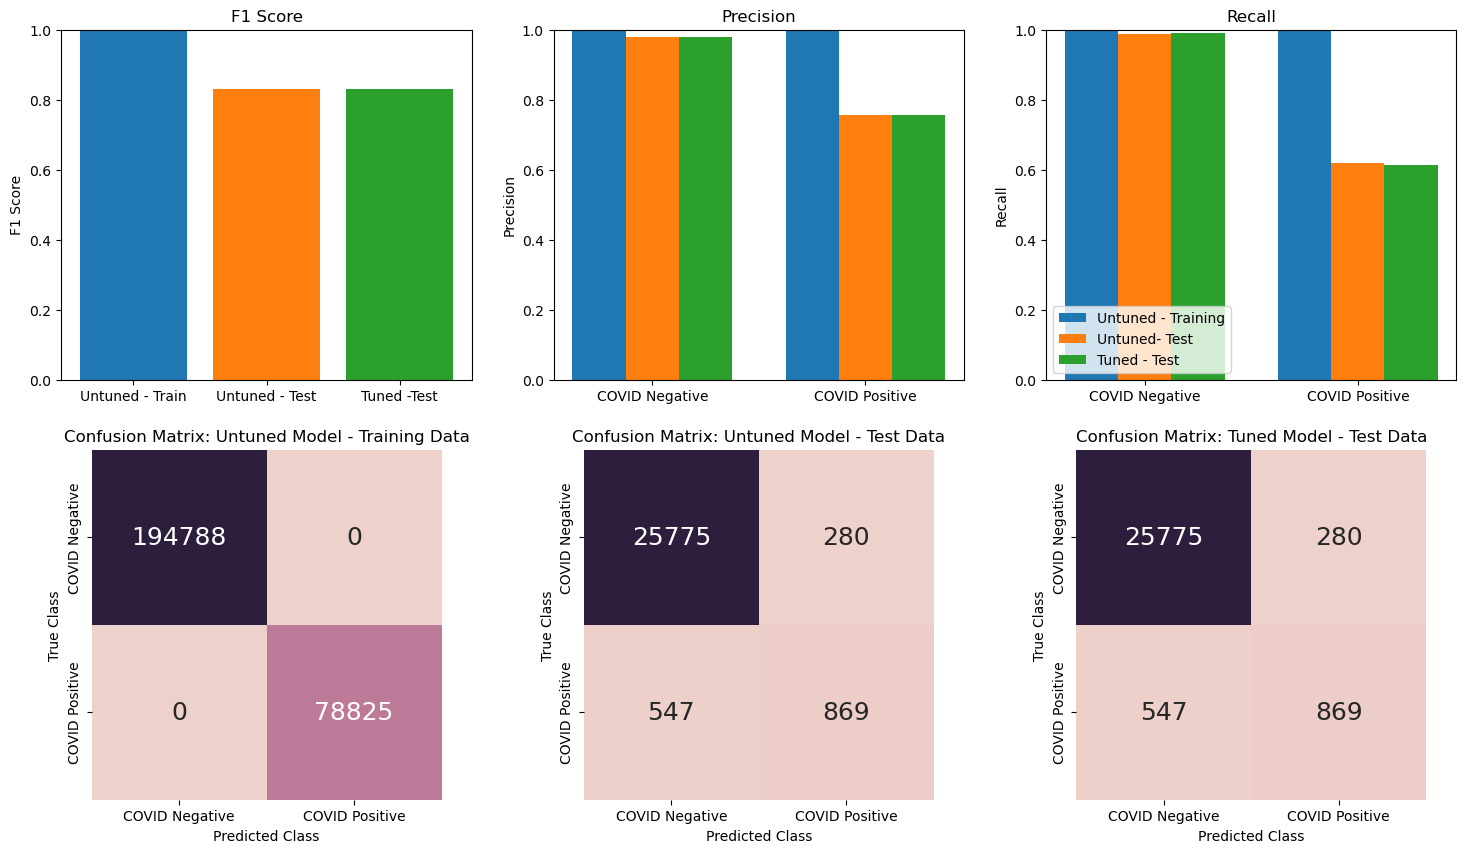

In [38]:
def plot_metrics(data, ax, metric):
    classes = ('COVID Negative', 'COVID Positive')
    x = np.arange(len(classes))
    multiplier = 0
    for var, value in data.items():
        offset = multiplier * 0.25
        ax.bar(x + offset, value, 0.25, label=var)
        multiplier += 1
    ax.set_ylabel(metric)
    ax.set_title(metric)
    ax.set_xticks(ticks = [0.25, 1.25])
    ax.set_xticklabels(labels = classes)
    ax.set_ylim(0, 1)

fig, axs = plt.subplots(2,3, figsize = (18, 10))
# data for weighted F1 score
f1_data = [f1_score(y_train, y_pred_train, average = 'macro'),f1_score(y_test, y_pred_test, average = 'macro'),f1_score(y_test, y_pred_test_tuned, average = 'macro')]
# plot weighted F1 score
axs[0,0].bar([1,2,3], f1_data,color = ['C0', 'C1', 'C2'])
axs[0,0].set_ylim(0, 1)
axs[0,0].set_ylabel('F1 Score')
axs[0,0].set_title('F1 Score')
axs[0,0].set_xticks(ticks = [1,2,3])
axs[0,0].set_xticklabels(labels = ['Untuned - Train', 'Untuned - Test', 'Tuned -Test'])
#plot precision
plot_metrics({'Untuned - Training': res_train[0],'Untuned- Test': res_test[0],'Tuned - Test': res_test_tuned[0]}, axs[0,1], 'Precision')
#plot recall
plot_metrics({'Untuned - Training': res_train[1],'Untuned- Test': res_test[1],'Tuned - Test': res_test_tuned[1]}, axs[0,2], 'Recall')
#plot legend for last subplot of row 
axs[0,2].legend(loc='lower left')
# plot confusion matrices
plot_cnf(y_train, y_pred_train, axs[1,0], 'Confusion Matrix: Untuned Model - Training Data')
plot_cnf(y_test, y_pred_test, axs[1,1], 'Confusion Matrix: Untuned Model - Test Data')
plot_cnf(y_test, y_pred_test_tuned, axs[1,2], 'Confusion Matrix: Tuned Model - Test Data')

fig.subplots_adjust(wspace=0.2)
plt.show()
